In [2]:
import pandas as pd
import numpy as np
import comtypes.client
import sys
import matplotlib.pyplot as plt
import os
import math
import openpyxl

def connect_to_existing_etabs():
    
        helper = comtypes.client.CreateObject('ETABSv1.Helper');
        helper = helper.QueryInterface(comtypes.gen.ETABSv1.cHelper);

        try:
            myETABSObject = helper.GetObject("CSI.ETABS.API.ETABSObject");
            print("Conectado exitosamente")
        except (OSError,comtypes.COMError):
            print("Ha fallado.")
            sys.exit(-1);

        SapModel = myETABSObject.SapModel
        return SapModel,myETABSObject,helper;

SapModel, myETABSObject, helper = connect_to_existing_etabs()

# Ton_m_C = 12
tonf_m_C = 12
ret = SapModel.SetPresentUnits(tonf_m_C)

Conectado exitosamente


## Agregar registro

In [15]:
NumberTables=-1
TableKey=[]
TableName=[]
ImportType=[]
ReturnValue=-1

[NumberTables,Tablekey, Tablename, ImportType,ret]=SapModel.DatabaseTables.GetAvailableTables(NumberTables,TableKey,TableName,ImportType)
ret
#NumberTables
Tablename


table_key='Functions - Time History - User Defined'

table_data=SapModel.DatabaseTables.GetTableForEditingArray(table_key,'')

table_data


[1,
 ('Name', 'Time', 'Value', 'GUID'),
 5,
 ('RampTH',
  '0',
  '0',
  '439e1c47-c933-4fd4-a036-3cea19a8e131',
  'RampTH',
  '1',
  '1',
  '',
  'RampTH',
  '4',
  '1',
  '',
  'UnifTH',
  '0',
  '1',
  '775c8a3b-1883-41a0-ae8c-b0b021784063',
  'UnifTH',
  '1',
  '1',
  ''),
 0]

In [16]:
# Especifica la ruta de tu archivo Excel
ruta_excel = 'registro.xlsx'

# Lee los datos desde el archivo Excel
datos = pd.read_excel(ruta_excel, sheet_name='Hoja1')

# Extrae la primera columna como una lista de strings y guárdala en "periodo"
tiempo = datos.iloc[:, 0].astype(str).tolist()

# Extrae la segunda columna como una lista de strings y guárdala en "acc"
acc = datos.iloc[:, 1].astype(str).tolist()

# Ahora "periodo" y "acc" contienen las columnas del Excel como listas de strings
print("tiempo:", tiempo)
print("Acc:", acc)

# Crear una lista para almacenar la secuencia
secuencia = []

# Iterar a través de las listas "periodo" y "acc" para construir la secuencia
for tiempo_valor, acc_valor in zip(tiempo, acc):
    secuencia.extend(['UnifTH', tiempo_valor, acc_valor,'d925eba1-7275-4397-9dd5-da1ba9d35b1e'])

# La lista "secuencia" ahora contiene la secuencia deseada
print(secuencia)

tiempo: ['0.0', '0.005', '0.01', '0.015', '0.02', '0.025', '0.03', '0.035', '0.04', '0.045', '0.05', '0.055', '0.06', '0.065', '0.07', '0.075', '0.08', '0.085', '0.09', '0.095', '0.1', '0.105', '0.11', '0.115', '0.12', '0.125', '0.13', '0.135', '0.14', '0.145', '0.15', '0.155', '0.16', '0.165', '0.17', '0.175', '0.18', '0.185', '0.19', '0.195', '0.2', '0.205', '0.21', '0.215', '0.22', '0.225', '0.23', '0.235', '0.24', '0.245', '0.25', '0.255', '0.26', '0.265', '0.27', '0.275', '0.28', '0.285', '0.29', '0.295', '0.3', '0.305', '0.31', '0.315', '0.32', '0.325', '0.33', '0.335', '0.34', '0.345', '0.35', '0.355', '0.36', '0.365', '0.37', '0.375', '0.38', '0.385', '0.39', '0.395', '0.4', '0.405', '0.41', '0.415', '0.42', '0.425', '0.43', '0.435', '0.44', '0.445', '0.45', '0.455', '0.46', '0.465', '0.47', '0.475', '0.48', '0.485', '0.49', '0.495', '0.5', '0.505', '0.51', '0.515', '0.52', '0.525', '0.53', '0.535', '0.54', '0.545', '0.55', '0.555', '0.56', '0.565', '0.57', '0.575', '0.58', '0.

In [17]:
TableVersion = 1
NumberRecords = 1
tTableKey = 'Functions - Time History - User Defined'
fieldKeysIncluded = ['Name', 'Time', 'Value', 'GUID']

TableData = secuencia

ret = SapModel.DatabaseTables.SetTableForEditingArray(tTableKey, TableVersion,
fieldKeysIncluded, NumberRecords, TableData)
ret=SapModel.DatabaseTables.ApplyEditedTables(True)

ret

[0,
 0,
 0,
 1,
 '********** DATABASE IMPORT DEFINITION DATA **********\r\n\r\nETABS Version 20.3.0 Interactive Database Import\r\nImport Type and Options:  Interactive Database Editing\r\n     Elements Deleted from DB:  Delete object from model\r\n     Other Items Deleted from DB:  Delete item from model\r\n     Elements with Same Name in Model and DB:  Replace object in model\r\n     Other Items with Same Name in Model and DB:  Replace item in model\r\n     Elements (Except Links) in the Same Location:  Allow duplicates in the same location\r\n     Link Elements in the Same Location:  Allow duplicates in the same location\r\n     Items With Same Name in a DB Table:  Overwrite previous item\r\n     Import Control for Errors:  Abort import after 20 errors\r\n     Import Control for Warnings:  Abort import after 200 warnings\r\n\r\nImport started at \r\n\r\nImport completed at 02:17:59\r\nNumber of errors:  0\r\nNumber of warnings:  0\r\nNumber of informational messages:  1\r\n\r\n\r\n*

## Gráfica de Cortante basal Vs Tiempo

In [9]:
# Especifica la ruta de tu archivo Excel
ruta_excel = 'registro.xlsx'

# Lee los datos desde el archivo Excel
datos = pd.read_excel(ruta_excel, sheet_name='Hoja1')

# Extrae la primera columna como una lista de strings y guárdala en "periodo"
tiempo = datos.iloc[:, 0].astype(str).tolist()

#deselect all cases and combos
ret = SapModel.Results.Setup.DeselectAllCasesAndCombosForOutput()

#set case selected for output
ret = SapModel.Results.Setup.SetCaseSelectedForOutput("TH")

ret=SapModel.DatabaseTables.SetOutputOptionsForDisplay(False,0,0,0,True,0,0,False,0,0,2,2,2,2,1)
ret

name_table="Base Reactions"
#name_table = "Modal Participating Mass Ratios"
table = SapModel.DatabaseTables.GetTableForDisplayArray(name_table ,GroupName="")    
cols=table[2]
noOfRows=table[3]
vals=np.array_split(table[4],noOfRows)
df= pd.DataFrame(vals)
df.columns=cols
df

,OutputCase,CaseType,StepType,StepNumber,StepLabel,FX,FY,FZ,MX,MY,MZ,X,Y,Z
0,ANLE XX,NonStatic,Step By Step,0,None,0,0,815.749,4078.7448,-4282.682,0,0,0,0
1,ANLE XX,NonStatic,Step By Step,1,None,-13.1145,-1.089E-05,815.749,4078.7449,-4427.4151,65.5751,0,0,0
2,ANLE XX,NonStatic,Step By Step,2,None,-26.2292,-2.179E-05,815.749,4078.745,-4572.1499,131.1509,0,0,0
3,ANLE XX,NonStatic,Step By Step,3,None,-39.3451,-3.268E-05,815.749,4078.7452,-4716.8972,196.7324,0,0,0
4,ANLE XX,NonStatic,Step By Step,4,None,-52.4712,-4.358E-05,815.749,4078.7453,-4861.7576,262.3652,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2677,TH,NonDirHist,Step By Step,12.38,None,-95.6132,0.0008,815.749,4078.7829,-5340.7159,478.0848,0,0,0
2678,TH,NonDirHist,Step By Step,12.385,None,-97.4221,0.0005,815.749,4078.7829,-5369.3621,487.1257,0,0,0
2679,TH,NonDirHist,Step By Step,12.39,None,-98.9038,-0.0002,815.749,4078.7514,-5393.4426,494.5282,0,0,0
2680,RX,Combination,Max,None,None,862.8903,0.0008,0,0.0064,9496.4154,4602.0225,0,0,0


In [10]:
# Filtrar los registros donde 'OutputCase' es igual a 'SX'
df = df[df['OutputCase'] == 'TH']


# Obtener solo la columna 7 (en Python, las columnas se indexan desde 0)
cortantex = df.iloc[:, 5]  # Index 6 corresponde a la columna 7

# Convertir la columna en una lista numérica
cortantex = cortantex.tolist()

# Agregar el valor 0 al final de la lista
#cortantex.append('0')

# Convertir todos los elementos a números (incluso el '0' como cadena)
cortantex = [float(item) for item in cortantex]


# Extrae la primera columna como una lista de strings y guárdala en "periodo"
tiempo = datos.iloc[:, 0].astype(float).tolist()

# Ahora, desplazx contiene la columna 7 como una lista numérica con el valor 0 al final
print(cortantex)

[0.0, -0.2037, -0.172, -0.246, -0.3873, -0.5774, -0.7781, -0.8942, -0.7897, -0.345, 0.4931, 1.7095, 3.2725, 5.1933, 7.5333, 10.3562, 13.6837, 17.5013, 21.8008, 26.6157, 32.0137, 38.0513, 44.7266, 51.9794, 59.744, 67.9763, 76.6413, 85.7174, 95.1106, 104.8555, 114.945, 125.0438, 134.2973, 142.7306, 149.5069, 154.8529, 158.13, 160.6503, 162.0664, 162.4904, 161.8832, 159.985, 156.0258, 150.5648, 143.7192, 135.7022, 126.6301, 116.7659, 106.9902, 98.8246, 93.5072, 91.3538, 92.1229, 95.565, 101.5776, 110.1121, 121.0568, 134.1605, 149.0645, 165.285, 182.0387, 197.2053, 209.7898, 219.118, 225.1673, 228.4466, 230.0047, 229.9924, 228.4356, 225.0182, 219.1495, 211.6904, 203.2483, 194.422, 185.6907, 177.5579, 170.2736, 164.3351, 160.1297, 157.8537, 157.3971, 158.2925, 159.8464, 161.4506, 162.6675, 163.172, 162.5027, 159.9182, 154.4895, 145.4483, 132.4873, 115.8193, 95.9322, 73.2257, 47.9246, 19.6793, -21.3082, -58.6757, -95.7497, -133.5185, -164.9633, -185.9297, -206.4121, -223.963, -242.753, -260.

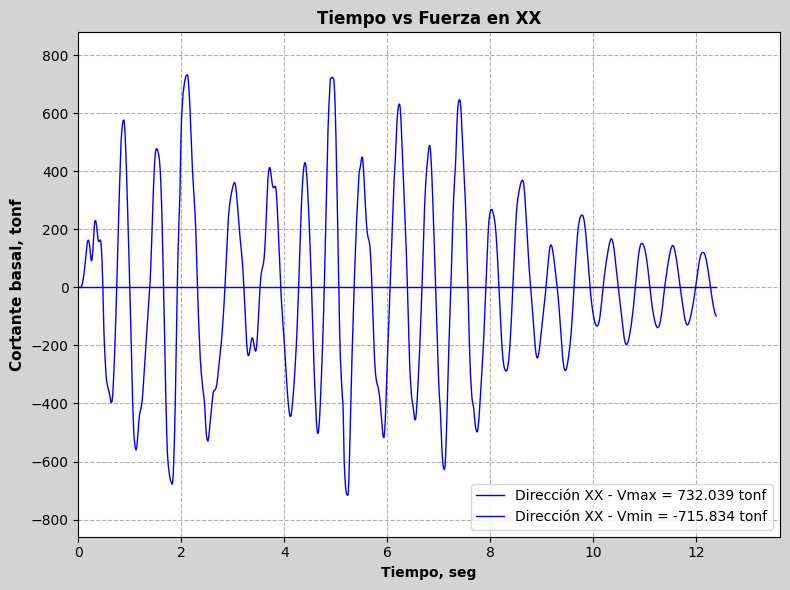

In [12]:
# Valor máximo de desplazx
max_cortantex = round(max(cortantex), 3)
min_cortantex = round(min(cortantex), 3)

# Crear el gráfico de dispersión con línea de conexión
#plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.figure(figsize=(8, 6), facecolor='lightgray')  # Tamaño del gráfico y color de fondo gris
#plt.scatter(desplazx, niveles, label='', marker='o', color='b', s=15)  # Puntos de dispersión
plt.plot(tiempo,cortantex , label=f'Dirección XX - Vmax = {max_cortantex} tonf', color='b', linewidth=1)  # Línea de conexión
plt.plot([0,max(tiempo)],[0,0] , label=f'Dirección XX - Vmin = {min_cortantex} tonf', color='b', linewidth=1)  # Línea de conexión
plt.xlabel('Tiempo, seg', fontsize=10, fontweight='bold')  # Etiqueta del eje X
plt.ylabel('Cortante basal, tonf', fontsize=11, fontweight='bold')  # Etiqueta del eje Y
plt.title('Tiempo vs Fuerza en XX', fontsize=12, fontweight='bold')  # Título del gráfico

# Leyenda en la parte inferior derecha
plt.legend(loc='lower right')

# Configuraciones adicionales para hacerlo más formal
plt.grid(True, linestyle='--')  # Cuadrícula con líneas punteadas
plt.tick_params(axis='both', which='major', labelsize=10)  # Tamaño de las etiquetas de los ejes
plt.xticks(rotation=0)  # Rotar etiquetas del eje X si es necesario
plt.xlim(0, max(tiempo)*1.1)  # Establecer límites del eje X desde 0 hasta el valor máximo de desplazx
plt.ylim(min(cortantex)*1.2, max(cortantex)*1.2)  # Establecer límites del eje Y desde 0 hasta el valor máximo de niveles
plt.tight_layout()  # Ajustar el diseño

# Guardar el gráfico en un archivo (opcional)
plt.savefig('fuerzatiempo.png', dpi=300)

# Mostrar el gráfico
plt.show()

## Desplazamiento Vs Tiempo

In [13]:
ret=SapModel.DatabaseTables.SetOutputOptionsForDisplay(False,0,0,0,True,0,0,False,0,0,2,2,2,2,1)
ret = SapModel.PointObj.SetSelected("90", True)

name_table="Joint Displacements"
table = SapModel.DatabaseTables.GetTableForDisplayArray(name_table ,GroupName="")    
cols=table[2]
noOfRows=table[3]
vals=np.array_split(table[4],noOfRows)
df= pd.DataFrame(vals)
df.columns=cols
df

,Story,Label,UniqueName,OutputCase,CaseType,StepType,StepNumber,StepLabel,Ux,Uy,Uz,Rx,Ry,Rz
0,Story5,1,81,ANLE XX,NonStatic,Step By Step,0,None,-4E-06,1E-06,-0.000524,-5.1E-05,7.2E-05,1.196E-07
1,Story5,1,81,ANLE XX,NonStatic,Step By Step,1,None,0.000996,1E-06,-0.000494,-5.1E-05,8.7E-05,1.162E-07
2,Story5,1,81,ANLE XX,NonStatic,Step By Step,2,None,0.001996,1E-06,-0.000463,-5E-05,0.000102,1.122E-07
3,Story5,1,81,ANLE XX,NonStatic,Step By Step,3,None,0.002996,1E-06,-0.000432,-5E-05,0.000117,1.087E-07
4,Story5,1,81,ANLE XX,NonStatic,Step By Step,4,None,0.003996,1E-06,-0.000402,-5E-05,0.000132,1.052E-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335245,Base,20,120,TH,NonDirHist,Step By Step,12.38,None,0,0,0,0,0,0
335246,Base,20,120,TH,NonDirHist,Step By Step,12.385,None,0,0,0,0,0,0
335247,Base,20,120,TH,NonDirHist,Step By Step,12.39,None,0,0,0,0,0,0
335248,Base,20,120,RX,Combination,Max,None,None,0,0,0,0,0,0


In [14]:
# Filtrar los registros donde 'OutputCase' es igual a 'SX'
df = df[(df['OutputCase'] == 'TH') & (df['UniqueName'] == '90')]

# Obtener solo la columna 7 (en Python, las columnas se indexan desde 0)
desplazx = df.iloc[:, 8]  # Index 6 corresponde a la columna 7

# Convertir la columna en una lista numérica
desplazx = desplazx.tolist()

# Agregar el valor 0 al final de la lista
#cortantex.append('0')

# Convertir todos los elementos a números (incluso el '0' como cadena)
desplazx = [float(item) for item in desplazx]


# Extrae la primera columna como una lista de strings y guárdala en "periodo"
tiempo = datos.iloc[:, 0].astype(float).tolist()

# Ahora, desplazx contiene la columna 7 como una lista numérica con el valor 0 al final
print(desplazx)

[-4e-06, -4e-06, -2e-06, 4.669e-07, 4e-06, 8e-06, 1.4e-05, 2.2e-05, 3e-05, 3.6e-05, 3.6e-05, 2.3e-05, -5e-06, -5.2e-05, -0.00012, -0.00021, -0.000322, -0.000459, -0.000626, -0.000827, -0.001065, -0.001345, -0.001672, -0.002049, -0.002479, -0.002963, -0.0035, -0.004088, -0.004724, -0.005407, -0.006134, -0.006903, -0.007713, -0.008553, -0.009411, -0.010266, -0.011091, -0.011858, -0.012543, -0.013124, -0.013589, -0.013932, -0.014148, -0.01423, -0.01417, -0.013957, -0.013581, -0.013038, -0.012332, -0.01148, -0.010516, -0.009495, -0.008478, -0.00752, -0.006663, -0.00593, -0.005337, -0.004895, -0.004621, -0.004538, -0.004672, -0.005045, -0.005672, -0.00655, -0.007656, -0.008944, -0.010353, -0.011821, -0.013293, -0.014733, -0.016113, -0.017412, -0.018611, -0.019686, -0.020611, -0.021357, -0.0219, -0.022218, -0.022303, -0.022156, -0.021792, -0.021232, -0.020493, -0.019588, -0.018518, -0.017281, -0.015877, -0.014312, -0.012602, -0.010768, -0.008836, -0.006829, -0.004776, -0.002707, -0.00065, 0.

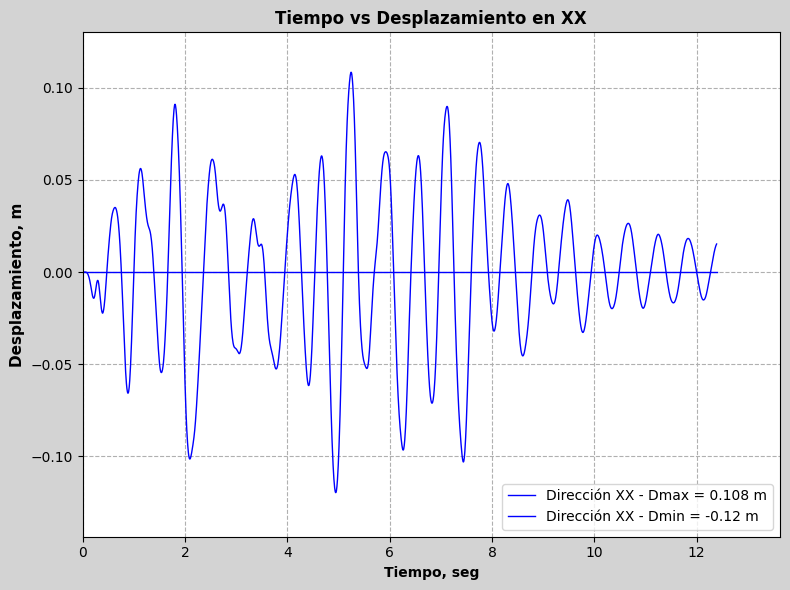

In [16]:
# Valor máximo de desplazx
max_desplazx = round(max(desplazx), 3)
min_desplazx = round(min(desplazx), 3)
# Crear el gráfico de dispersión con línea de conexión
#plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.figure(figsize=(8, 6), facecolor='lightgray')  # Tamaño del gráfico y color de fondo gris
#plt.scatter(desplazx, niveles, label='', marker='o', color='b', s=15)  # Puntos de dispersión
plt.plot(tiempo,desplazx , label=f'Dirección XX - Dmax = {max_desplazx} m', color='b', linewidth=1)  # Línea de conexión
plt.plot([0,max(tiempo)],[0,0] , label=f'Dirección XX - Dmin = {min_desplazx} m', color='b', linewidth=1)  # Línea de conexión
plt.xlabel('Tiempo, seg', fontsize=10, fontweight='bold')  # Etiqueta del eje X
plt.ylabel('Desplazamiento, m', fontsize=11, fontweight='bold')  # Etiqueta del eje Y
plt.title('Tiempo vs Desplazamiento en XX', fontsize=12, fontweight='bold')  # Título del gráfico

# Leyenda en la parte inferior derecha
plt.legend(loc='lower right')

# Configuraciones adicionales para hacerlo más formal
plt.grid(True, linestyle='--')  # Cuadrícula con líneas punteadas
plt.tick_params(axis='both', which='major', labelsize=10)  # Tamaño de las etiquetas de los ejes
plt.xticks(rotation=0)  # Rotar etiquetas del eje X si es necesario
plt.xlim(0, max(tiempo)*1.1)  # Establecer límites del eje X desde 0 hasta el valor máximo de desplazx
plt.ylim(min(desplazx)*1.2, max(desplazx)*1.2)  # Establecer límites del eje Y desde 0 hasta el valor máximo de niveles
plt.tight_layout()  # Ajustar el diseño

# Guardar el gráfico en un archivo (opcional)
plt.savefig('desplaztiempo.png', dpi=300)

# Mostrar el gráfico
plt.show()